# <center>**Project 2 : IMAGE PROCESSING** </center>
**Subject**        : Applied Mathematics and Statistics for Imformation Technology <br>
**Student Name**   : Phạm Hồng Gia Bảo <br>
**Student ID**     : 21127014 <br>
**Class**          : 21CLC07 <br>

In [31]:
import time # to count time compile and run code
import numpy as np
from PIL import Image
import matplotlib as mpl
import matplotlib.pyplot as plt

# 1. Brightness

In [32]:
def adjust_Brightness(img, name_img):
    brightValue = 100 
    result = np.uint8(np.clip(img + np.array([brightValue], dtype=np.int16), 0, 255))
    plt.figure() # create a new figure object
    plt.imshow(result)
    plt.title("Image After Adjust Brightness")
    plt.show()
    Image.fromarray(result).save(name_img.split('.')[0] + '_brightness_at_' + str(brightValue) +  '.png')

# 2. Constrast

In [33]:
def adjust_contrast(img, name_img):
    contrast = 100 # can change with any int from -255 to 255
    contrast = np.clip(float(contrast), -255, 255)
    factor = (259 * (contrast + 255)) / (255 * (259 - contrast))
    result = np.uint8(np.clip(factor * (img.astype(float) - 128) + 128, 0, 255))
    plt.figure() # create a new figure object
    plt.imshow(result)
    plt.title("Image After Adjust Contrast")
    plt.show()
    Image.fromarray(result).save(name_img.split('.')[0] + '_contrast_at_'   + str(contrast) + '.png')

# 3. Flip

In [34]:
def flipImg(image, name_img):
    type = 'Vertical'
    print('#1 : Vertical')
    print('#2 : Horizontal')
    direction = input("Enter flip direction: ")
    if direction == '1':
        result = np.flipud(image)
    elif direction == '2':
        type = 'Horizontal'
        result = np.fliplr(image)
    plt.figure() # create a new figure object
    plt.imshow(result)
    plt.title("Image After Flip " + type )
    plt.show()
    Image.fromarray(result).save(name_img.split('.')[0] + '_flip_' + direction + '.png')

# 4. RGB to Grayscale/Sepia

#### 4.1 Graycolor

In [35]:
def grayScale(img, name_img):
    gray_matrix = np.array([0.399, 0.687, 0.214])
    result = np.uint8(np.dot(img[..., :3], gray_matrix))
    plt.figure() # create a new figure object
    plt.imshow(result, cmap='gray')
    plt.title("Image After Convert to GrayScale")
    plt.show()
    Image.fromarray(result).save(name_img.split('.')[0] + '_grayscale' + '.png', cmap='gray')

#### 4.2 Sepia color

In [36]:

def sepiaColor(image, name_img):
    sepia_matrix = np.array([[0.393, 0.769, 0.189],
                             [0.349, 0.686, 0.168],
                             [0.272, 0.534, 0.131]])
    sepia_image = np.dot(image[..., :3], sepia_matrix.T)
    sepia_image = np.clip(sepia_image, 0, 255)
    sepia_image = sepia_image.astype(np.uint8)
    plt.figure() # create a new figure object
    plt.imshow(sepia_image)
    plt.title("Image After Convert to Sepia")
    plt.show()
    Image.fromarray(sepia_image).save(name_img.split('.')[0] + '_sepia' + '.png')

#### 4.3 Convert Option

In [37]:
def convert_rgb(img, name_img):
    print('#1 : Convert to Grayscale')
    print('#2 : Convert to Sepia')
    direction = int(input("Enter convert option: "))
    if direction == 1:
        grayScale(img, name_img)
    elif direction == 2:
        sepiaColor(img, name_img)   

# 5. Blur/Sharpen

#### 5.1 Blur

In [38]:
def convolve_layer(layer, kernel):
    view = kernel.shape + tuple(np.subtract(layer.shape, kernel.shape) + 1)
    submatrices = np.lib.stride_tricks.as_strided(layer, shape = view, strides = layer.strides * 2)
    return np.einsum('ij,ijkl->kl', kernel, submatrices)

def blur_Img(image, name_img):
    kernel_size = 40 
    sigma = (kernel_size - 1)/6
    # Gaussian_kernel
    kernel_1d = np.linspace(-(kernel_size // 2), kernel_size // 2, num=kernel_size)
    kernel_1d = np.array(1 / (np.sqrt(2 * np.pi) * sigma) * (np.exp(-np.power(kernel_1d / sigma, 2) / 2)))
    kernel_2d = np.outer(kernel_1d.T, kernel_1d.T)
    kernel_2d *= 1.0 / np.sum(kernel_2d)
    kernel = kernel_2d 
    # convolution
    result = np.uint8(np.dstack((convolve_layer(image[:,:,0], kernel), 
                                 convolve_layer(image[:,:,1], kernel), 
                                 convolve_layer(image[:,:,2], kernel))))
    
    plt.figure() # create a new figure object
    plt.imshow(result)
    plt.title("Image After Blur")
    plt.show()

    Image.fromarray(result).save(name_img.split('.')[0] + '_blur_' + str(kernel_size) + '.png')

#### 5.1 Sharpen

In [39]:
def blurforsharp(picture):
    picture = np.array(picture)
    
    kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
    picture_result = np.zeros(picture.shape)
    
    kernelDim = kernel.shape[0]
    kernel_sum = np.sum(kernel)
    
    # Normalize kernel
    if kernel_sum != 0:
        kernel = kernel / kernel_sum
    for i in range(kernelDim):
        for j in range(kernelDim):
            rowShiftValue = int(i - kernelDim/2)
            colShiftValue = int(j - kernelDim/2)
            shiftedArray = np.roll(picture, (rowShiftValue, colShiftValue), axis=(0, 1))
            picture_result += shiftedArray * kernel[i,j]
        
    picture_result = picture_result.astype(np.uint8)
    
    # Clip picture2 values between 0 and 255
    picture_result = np.clip(picture_result, 0, 255)

    return picture_result


def Sharpen(picture2, name_img):
    
    picture2 = np.array(picture2)
    temp = picture2.shape
    kernel = np.array([[1,1,1], [1,1,1], [1,1,1]]) / 9  
    # Apply high-pass filter to enhance edges
    kernelDim = kernel.shape[0]
    
    picture2 = blurforsharp(picture2)

    # Subtract the blurred picture2 from the original picture2 to increase sharpness
    picture2_result = np.zeros(picture2.shape)
    for i in range(kernelDim):
        for j in range(kernelDim):
            rowShiftValue = int(i - kernelDim/2)
            colShiftValue = int(j - kernelDim/2)
            shiftedArray = np.roll(picture2, (rowShiftValue, colShiftValue), axis=(0, 1))
            picture2_result += shiftedArray * kernel[i,j]
    picture2_result = picture2_result.reshape(temp)
    picture2_result = picture2_result.astype(np.uint8)
    
    plt.figure() # create a new figure object
    plt.imshow(picture2_result)
    plt.title("Image After Sharpen")
    plt.show()
    Image.fromarray(picture2_result).save(name_img.split('.')[0] + '_sharpen' + '.png')

#### 5.3 Option Blur/Sharpen

In [40]:
def blur_sharpen_img(img, name_img):
    print('#1 : Blur Image')
    print('#2 : Sharpen Image')
    direction = int(input("Enter option: "))
    if direction == 1:
        blur_Img(img, name_img)
    elif direction == 2:
        Sharpen(img, name_img)

# 6. Crop in Center

In [41]:
def crop_img_center(image, name_img):
    image1 = Image.open(name_img)

    # Get the size of the image
    width, height = image1.size

    # Calculate the coordinates of the center quarter of the image
    left = width / 4
    upper = height / 4
    right = 3 * width / 4
    lower = 3 * height / 4
    # Cast the coordinates to integers
    left = int(left)
    upper = int(upper)
    right = int(right)
    lower = int(lower)

    # Crop the image to the center quarter
    cropped_image = image[upper:lower, left:right, :]
    
    plt.figure() # create a new figure object
    plt.imshow(cropped_image)
    plt.title("Image After Crop in Center")
    plt.show()
    Image.fromarray(np.array(cropped_image)).save(str(name_img.split('.')[0]) + '_center_crop' + '.png')

# 7. Circular Mask

In [42]:
def circular_Crop(image, name_img):
    # create circular mask
    center=None
    radius=None
    if center is None: # use the middle of the image
        center = (int(image.shape[1]/2), int(image.shape[0]/2))
    if radius is None: # use the smallest distance between the center and image walls
        radius = min(center[0], center[1], image.shape[1]-center[0], image.shape[0]-center[1])

    Y, X = np.ogrid[:image.shape[0], :image.shape[1]]
    dist_from_center = np.sqrt((X - center[0])**2 + (Y-center[1])**2)

    mask = dist_from_center <= radius
    
    # Load the original image
    original_image = np.array(Image.open(name_img))
    # Apply the circular mask to a copy of the original image
    masked_image = original_image.copy()
    #mask = create_circular_mask(original_image.shape[0], original_image.shape[1])
    masked_image[~mask] = 0
    # Restore the original image by setting the pixels outside of the mask to the corresponding
    # pixel values from the original image
    restored_image = original_image.copy()
    restored_image[~mask] = masked_image[~mask]
    
    plt.figure() # create a new figure object
    plt.imshow(restored_image)
    plt.title("Image After Adjust Contrast")
    plt.show()
    Image.fromarray(restored_image).save(name_img.split('.')[0] + '_circular_crop' + '.png')

# 9. Diagonal Ellipses Frame

In [43]:
def ellipse_Crop(image, name_img):
    # create elipse mask
    center=None
    radius=None
    d = min(image.shape[1],image.shape[0])
    if center is None: # use the middle of the image
        center = (int(d/2), int(d/2))
    if radius is None: # use the smallest distance between the center and image walls
        radius = min(center[0], center[1], image.shape[1]-center[0], image.shape[0]-center[1])
        
    Y, X = np.ogrid[:image.shape[0],:image.shape[1]]
    xe = -(X-center[1]) + (Y-center[0])
    ye = (X-center[1]) + (Y-center[0])
    e = (xe)**2/((d)*(2**0.5)) + (ye)**2/((d/4)*(2**0.5))

    xe1 = (X-center[1]) + (Y-center[0])
    ye1 = -(X-center[1]) + (Y-center[0])
    e1 = (xe1)**2/((d)*(2**0.5))+ (ye1)**2/((d/4)*(2**0.5)) 

    mask = e <= radius
    mask1 = e1 <= radius
    mask2 = mask | mask1
    image[~mask2] = 0
    
    plt.figure() # create a new figure object
    plt.imshow(image)
    plt.title("Image After Adjust Contrast")
    plt.show()
    Image.fromarray(image).save(name_img.split('.')[0] + '_ellipse_crop' + '.png')


In [44]:
def processing_option(image, name_img, option):
    if (option == 0):
        for i in range(1, 9):
            new_img =  image
            processing_option(new_img, name_img, i)
            
    if (option == 1):
        start_time = time.time()
        adjust_Brightness(image, name_img)
        end_time = time.time()
        print('Running time for Adjusting Brightness : ', round(end_time - start_time, 3), 's')
        
    if (option == 2):
        start_time = time.time()
        adjust_contrast(image, name_img)
        end_time = time.time()
        print('Running time for Adjusting Contrast : ', round(end_time - start_time, 3), 's')
        
    if (option == 3):
        start_time = time.time()
        flipImg(image, name_img)
        end_time = time.time()
        print('Running time for Flip Image : ', round(end_time - start_time, 3), 's')
        
    if (option == 4):
        start_time = time.time()
        convert_rgb(image, name_img)
        end_time = time.time()
        print('Running time for Convert from RBG to Grayscale/Sepia : ', round(end_time - start_time, 3), 's')
        
    if (option == 5):
        start_time = time.time()
        blur_sharpen_img(image, name_img)
        end_time = time.time()
        print('Running time for Blur/Sharpen Image : ', round(end_time - start_time, 3), 's')
        
    if (option == 6):
        start_time = time.time()
        crop_img_center(image, name_img)
        end_time = time.time()
        print('Running time for Crop Image to Size (Crop in Center) : ', round(end_time - start_time, 3), 's')
        
    if (option == 7):
        start_time = time.time()
        circular_Crop(image, name_img)
        end_time = time.time()
        print('Running time for Crop Image in a Circular Frame : ', round(end_time - start_time, 3), 's')
        
    if (option == 8):
        start_time = time.time()
        ellipse_Crop(image, name_img)
        end_time = time.time()
        print('Running time for Crop Image in frame is 2 diagonal ellipses : ', round(end_time - start_time, 3), 's')


# Main

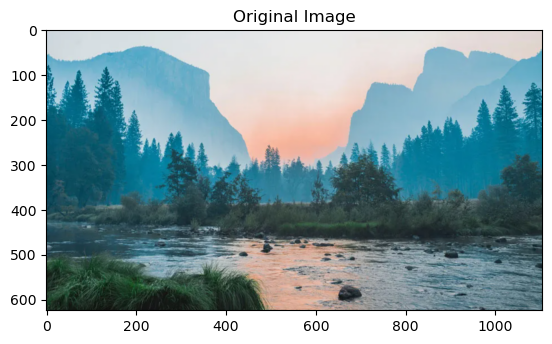

*************************** MAIN MENU *************************
#0   Do all tasks
#1   Adjust Brightness
#2   Adjust Contrast
#3   Flip Image (Vertical/Horizontal)
#4   Convert from RBG to Grayscale/Sepia
#5   Blur and Sharpen Image
#6   Crop Image to Size (Crop in Center)
#7   Crop Image in a Circular Frame
#8   Advanced: Crop Image in frame is 2 diagonal ellipses
***************************************************************


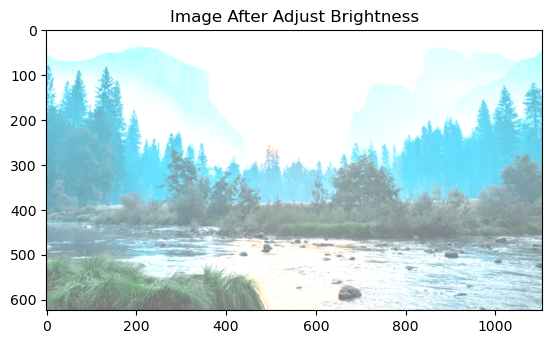

Running time for Adjusting Brightness :  0.999 s


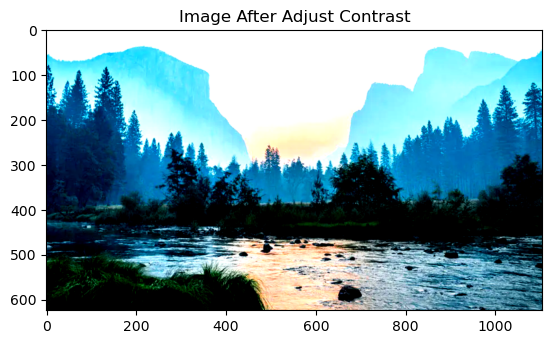

Running time for Adjusting Contrast :  0.958 s
#1 : Vertical
#2 : Horizontal


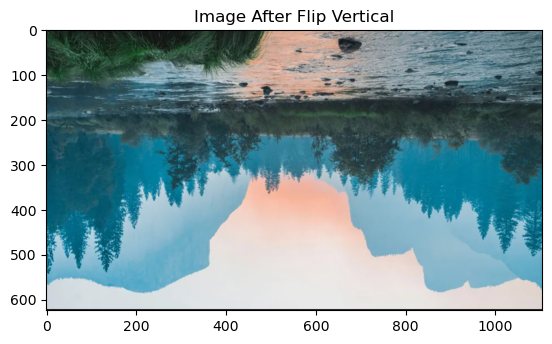

Running time for Flip Image :  2.67 s
#1 : Convert to Grayscale
#2 : Convert to Sepia


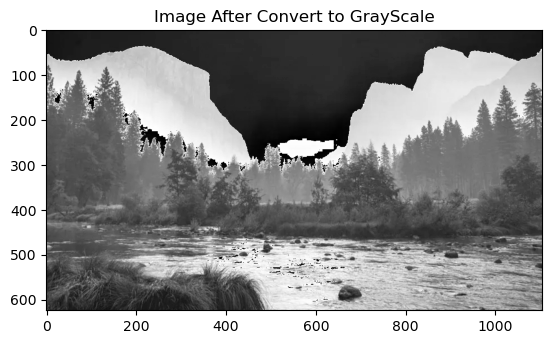

Running time for Convert from RBG to Grayscale/Sepia :  1.613 s
#1 : Blur Image
#2 : Sharpen Image


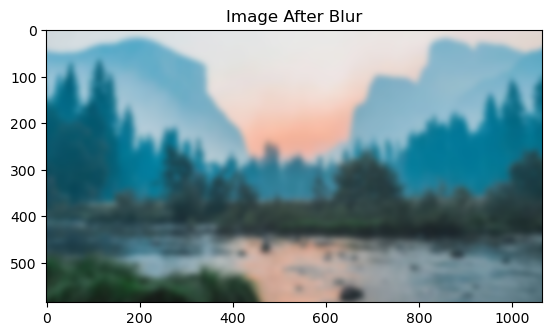

Running time for Blur/Sharpen Image :  6.918 s


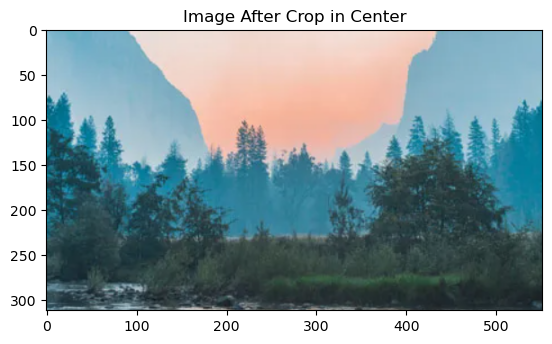

Running time for Crop Image to Size (Crop in Center) :  0.598 s


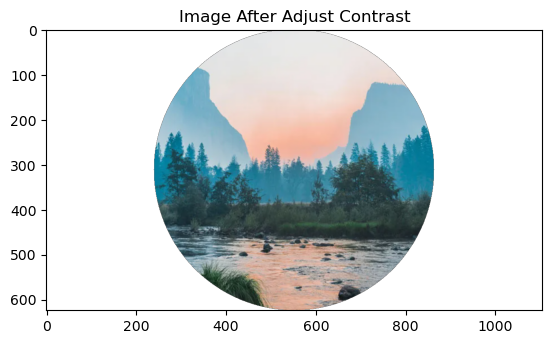

Running time for Crop Image in a Circular Frame :  0.83 s


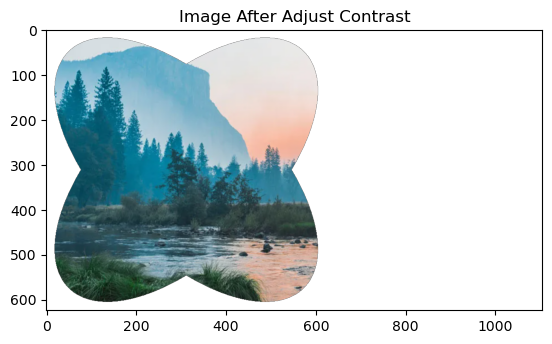

Running time for Crop Image in frame is 2 diagonal ellipses :  0.804 s


In [45]:
def main():
    
    name_img =input("Enter image name : ") # shoot.png
    image = Image.open(name_img)
    image = np.array(image)
    
    # create a new figure object
    plt.figure() 
    plt.imshow(image)
    plt.title("Original Image")
    plt.show()
    
    print('*************************** MAIN MENU *************************')
    print('#0   Do all tasks')
    print('#1   Adjust Brightness')
    print('#2   Adjust Contrast')
    print('#3   Flip Image (Vertical/Horizontal)')
    print('#4   Convert from RBG to Grayscale/Sepia')
    print('#5   Blur and Sharpen Image')
    print('#6   Crop Image to Size (Crop in Center)')
    print('#7   Crop Image in a Circular Frame')
    print('#8   Advanced: Crop Image in frame is 2 diagonal ellipses')
    print('***************************************************************')
    
    option= int(input('Enter option : '))
    processing_option(image, name_img, option)
    
main()